In [136]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
from scipy.optimize import curve_fit

In [137]:
def power_law(r, psi):
    return r**psi

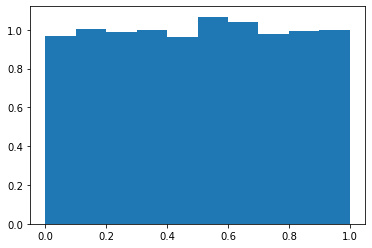

In [209]:
"""
Store a sparse matrix which contains all the couplings for bond and field strengths 
Decimate bonds according to Ma-Dasgupta while keeping track of the energy scale, number of decimated bonds, etc.
Discard couplings below some scale, since the they are unaffected by the decimation (potentially dynamically scale it)
"""

#First pass

N = 10000
J_ij_vals = np.exp(-np.random.exponential(size=N))            #FM couplings
h_vals = np.exp(-np.random.exponential(size=N))               #PM couplings

plt.hist(J_ij_vals, density=True)
plt.show()


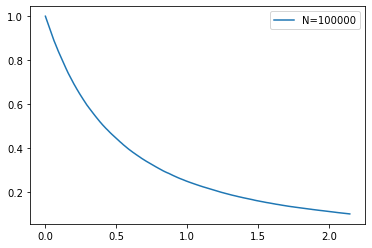

In [215]:
#dOmega = 0.005


fig, plot = plt.subplots()

for N in [100000]:
    
    steps = int(0.9*N)
    J_ij_vals = np.exp(-np.random.exponential(size=N))            #FM couplings
    h_vals = np.exp(-np.random.exponential(size=N))                       #PM couplings       
    Gamma_array = []


    #dec_spins = []

    for step in range(steps):

        Omega_0 = max(J_ij_vals.max(), h_vals.max())
        Gamma_array.append(Omega_0)

        if Omega_0 == J_ij_vals.max():
            k = np.where(J_ij_vals == Omega_0)[0]
            h_vals[k] = h_vals[k] * h_vals[(k+1)%len(h_vals)]/Omega_0

            h_vals[(k+1)%len(h_vals)] = 0
            J_ij_vals[k] = 0

        elif Omega_0 == h_vals.max():
            k = np.where(h_vals == Omega_0)[0]
            J_ij_vals[k] = J_ij_vals[k]*J_ij_vals[k-1]/Omega_0

            J_ij_vals[k-1] = 0
            h_vals[k] = 0

        h_vals = h_vals[h_vals!=0]
        J_ij_vals = J_ij_vals[J_ij_vals!=0]

    trunc_N = int(N*0)

    Gamma_trunc = Gamma_array[trunc_N:]

    n_array = (-np.arange(len(Gamma_trunc))/(N-trunc_N) + 1)
    Gammas = np.array(Gamma_trunc)
    Gammas = np.log(Gammas[0]/Gammas)


    plot.plot(Gammas, n_array, label="N="+str(N))

plot.legend()

Text(0.5, 0, 'Flow parameter $\\Gamma = ln(\\Omega_0/\\Omega)$')

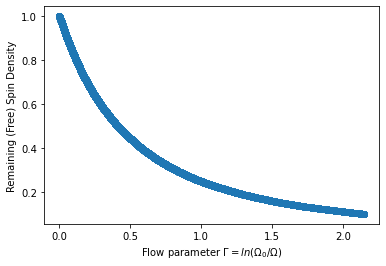

In [216]:
trunc_N = int(N*0)

Gamma_trunc = Gamma_array[trunc_N:]

n_array = (-np.arange(len(Gamma_trunc))/(N-trunc_N) + 1)
Gammas = np.array(Gamma_trunc)
Gammas = np.log(Gammas[0]/Gammas)

fig, plot = plt.subplots()
plot.scatter(Gammas, n_array)
plot.plot(Gammas, (Gammas+1)**-2)
#plot.invert_xaxis()
plt.ylabel("Remaining (Free) Spin Density")
plt.xlabel(r"Flow parameter $\Gamma = ln(\Omega_0/\Omega)$")

In [217]:
x_data = Gammas + 1
y_data = n_array

popt, pcov = curve_fit(power_law, x_data, y_data)

popt

array([-2.0067107])

(array([1.05301446e-01, 4.31660482e-02, 1.79813626e-02, 7.45481065e-03,
        3.61064323e-03, 1.38318173e-03, 3.95194781e-04, 2.51487588e-04,
        7.18535966e-05, 1.79633992e-05]),
 array([ 2.22443068,  7.79130581, 13.35818094, 18.92505607, 24.4919312 ,
        30.05880633, 35.62568146, 41.19255659, 46.75943172, 52.32630685,
        57.89318198]),
 <BarContainer object of 10 artists>)

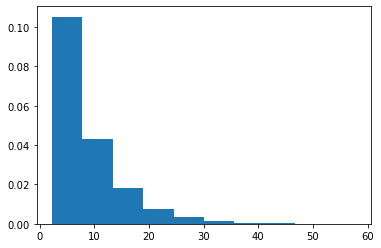

In [182]:
plt.hist(-np.log(J_ij_vals), density=True)